In [ ]:
import torch

import torchvision
import torchvision.transforms as transforms

import torch.optim as optim
import torch.nn as nn

print("GPU availible: {}".format(torch.cuda.is_available()))

GPU availible: True


In [ ]:
if torch.cuda.is_available():
  device='cuda'
else:
  device='cpu'

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5))])

In [ ]:
trainset = torchvision.datasets.MNIST('mnist',
                                      train=True,
                                      download=True,
                                      transform =transform)

testset = torchvision.datasets.MNIST('mnist',
                                      train=False,
                                      download=True,
                                      transform =transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 255095448.21it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 115038645.61it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 59522772.35it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 22438785.36it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [ ]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


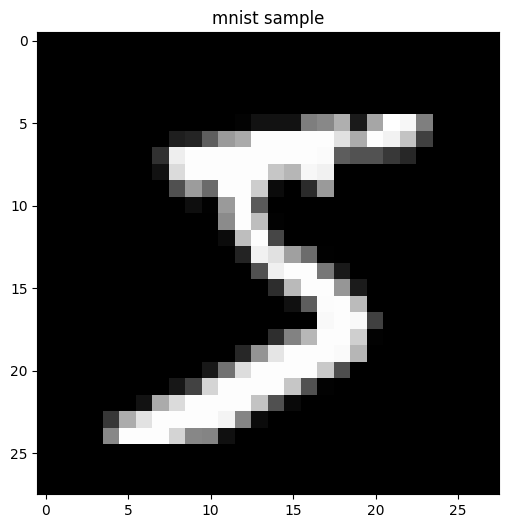

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imgshow(title="", image = None, size=6):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(size*aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

image=trainset.data[0].numpy()
imgshow('mnist sample', image)

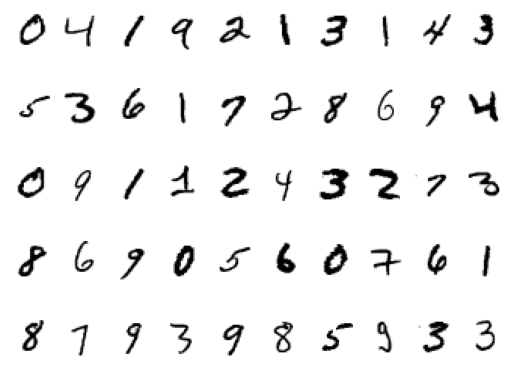

In [ ]:
figure = plt.figure()
num = 50

for index in range(1, num+1):
  plt.subplot(5,10,index)
  plt.axis('off')
  plt.imshow(trainset.data[index], cmap='gray_r')

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset,
                                         batch_size=128,
                                         shuffle=True,
                                         num_workers=0)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=128,
                                         shuffle=False,
                                         num_workers=0)

In [ ]:
dataiter = iter(trainloader)

images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


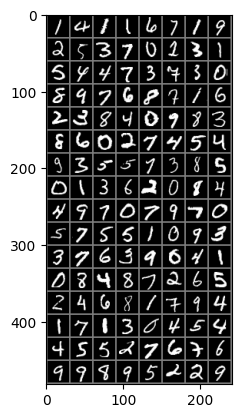

14116719253701315447373089768716238409838602745493557385013620844970797057551093376390410848726524681794171304544552767699895229


In [ ]:
def imshow(img):
  img = img/2+0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

imshow(torchvision.utils.make_grid(images))

print(''.join('%1s' % labels[j].numpy() for j in range(128)))

In [ ]:
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(1,32,3)
    self.conv2 = nn.Conv2d(32,64,3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(64*12*12, 128)
    self.fc2 = nn.Linear(128,10)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 64*12*12) #Flattening layer
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
import torch.optim as optim

crit = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
epochs = 3

epoch_log = []
loss_log=[]
accuracy_log = []

for epoch in range(epochs):
  print(f'Starting Epoch: {epoch+1}...')

  running_loss = 0.0

  for i,data in enumerate(trainloader,0):
    inputs,labels = data

    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = crit(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i%50 == 49:
      correct=0
      total=0
      with torch.no_grad():
        for data in testloader:
          images, labels = data

          images = images.to(device)
          labels = labels.to(device)

          outputs = net(images)

          _, predicted = torch.max(outputs.data, dim = 1)
          total+= labels.size(0)
          correct += (predicted==labels).sum().item()
        accuracy = 100*correct/total
        epoch_num = epoch+1
        actual_loss = running_loss/50
        print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy: {accuracy:.3f}%')
        running_loss = 0.0

  epoch_log.append(epoch_num)
  loss_log.append(actual_loss)
  accuracy_log.append(accuracy)

print('Finished Training')

Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, Loss: 2.270, Test Accuracy: 37.840%
Epoch: 1, Mini-Batches Completed: 100, Loss: 2.157, Test Accuracy: 63.840%
Epoch: 1, Mini-Batches Completed: 150, Loss: 1.869, Test Accuracy: 70.200%
Epoch: 1, Mini-Batches Completed: 200, Loss: 1.239, Test Accuracy: 81.850%
Epoch: 1, Mini-Batches Completed: 250, Loss: 0.683, Test Accuracy: 85.260%
Epoch: 1, Mini-Batches Completed: 300, Loss: 0.482, Test Accuracy: 88.010%
Epoch: 1, Mini-Batches Completed: 350, Loss: 0.439, Test Accuracy: 88.770%
Epoch: 1, Mini-Batches Completed: 400, Loss: 0.386, Test Accuracy: 89.390%
Epoch: 1, Mini-Batches Completed: 450, Loss: 0.398, Test Accuracy: 90.280%
Starting Epoch: 2...
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.358, Test Accuracy: 90.940%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.329, Test Accuracy: 91.340%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.307, Test Accuracy: 91.720%
Epoch: 2, Mini-Batches Completed: 200, Loss: 0.291, Test Acc

In [ ]:
PATH = './mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

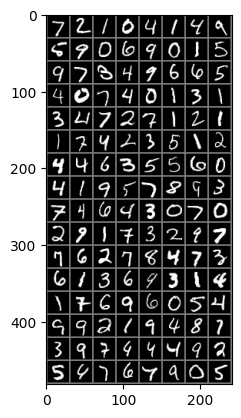

GroundTruth:  72104149590690159734966540740131347271211742351244635560419578937464307029173297762784736136931417696054992194873974449254767905


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ''.join('%1s' % labels[j].numpy() for j in range(128)))

In [ ]:
net = Net()
net.to(device)

net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
correct = 0
total=0

with torch.no_grad():
  for data in testloader:
    images, labels = data

    images = images.to(device)
    labels = labels.to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100 *correct/total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.3}%')

Accuracy of the network on the 10000 test images: 94.9%


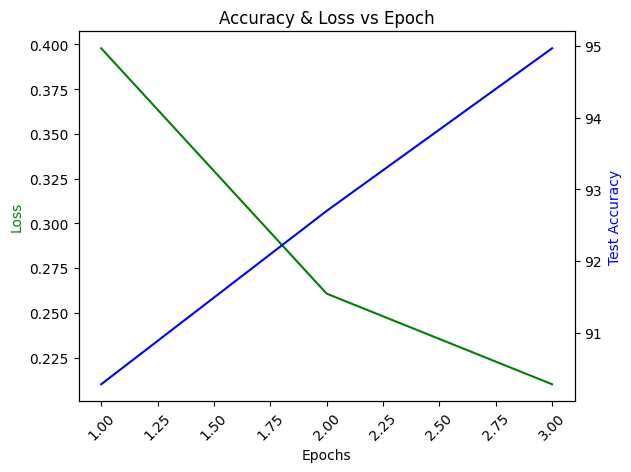

In [ ]:
fig, ax1 = plt.subplots()

plt.title('Accuracy & Loss vs Epoch')
plt.xticks(rotation=45)

ax2 = ax1.twinx()

ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color = 'g')
ax2.set_ylabel('Test Accuracy', color = 'b')

plt.show()

In [ ]:
epoch_log = list(range(1,11))
epoch_log

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
pred_list = torch.zeros(0, dtype=torch.long, device='cpu')
label_list = torch.zeros(0, dtype=torch.long, device='cpu')
with torch.no_grad():
  for i, (inputs, classes) in enumerate(testloader):
    inputs = inputs.to(device)
    classes = classes.to(device)
    outputs = net(inputs)
    _, preds = torch.max(outputs,1)
    pred_list = torch.cat([pred_list, preds.view(-1).cpu()])
    pred_list = torch.cat([label_list, classes.view(-1).cpu()])

conf_mat = confusion_matrix(label_list.numpy(), pred_list.numpy())
print(conf_mat)

In [ ]:
print(classification_report(label_list.numpy(), pred_list.numpy()))